# Patreon data analysis challenge for position "Scientist to Data Scientist"

Topic: VR addiction analysis

Analyzed by YunWen (Darren) Chu

Data downloaded from Zenodo: https://zenodo.org/records/14671448

# A. Preprocessing

## Import libraries and Load data

In [5]:
import sys
print(sys.executable)

D:\Anaconda\python.exe


In [6]:
import numpy as np 
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import os
import warnings
warnings.filterwarnings('ignore')

# # Add parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
parent_dir = parent_dir + '\\'
sys.path.append(parent_dir)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from fuzzywuzzy import fuzz
from collections import Counter

In [8]:
# Dataset for "Analysis and Prediction of Addiction among Virtual Reality Users"
# https://zenodo.org/records/14671448
df = pd.read_csv(parent_dir + '/data/Dataset.csv')
df.head(3)


,ID,Age,Gender,Country,Days_week,Hours_day,Hours_per_week,VR_app,Game,SocialVR,...,GAS7.2,GAS7.3,GAS7.4,GAS7.5,GAS7.6,GAS7.7,GAS7_sum,Monothetic,Polythetic,Polythetic_strict
0,1,27,Male,United States,2.0,4.5,9.0,Blade and Sorcery,1,0,...,3,4,1,2,2,2,17,0,0,0
1,2,22,Male,United States,5.0,3.6,18.0,NeosVR,0,1,...,4,3,1,2,1,2,14,0,0,0
2,3,25,Male,United States,4.0,14.0,56.0,Cardboard,1,0,...,4,5,4,5,3,3,29,1,1,1


## Check for missing data 

In [10]:
df.columns

Index(['ID', 'Age', 'Gender', 'Country', 'Days_week', 'Hours_day',
       'Hours_per_week', 'VR_app', 'Game', 'SocialVR', 'Other',
       'Spatial_presence', 'Embodiment', 'GAS7.1', 'GAS7.2', 'GAS7.3',
       'GAS7.4', 'GAS7.5', 'GAS7.6', 'GAS7.7', 'GAS7_sum', 'Monothetic',
       'Polythetic', 'Polythetic_strict'],
      dtype='object')

In [11]:
# Missing data
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print(f"{i} null rate: {round(null_rate,2)}")

In [12]:
df=df.dropna()
df=df.drop_duplicates()

In [13]:
df.isnull().sum()

ID                   0
Age                  0
Gender               0
Country              0
Days_week            0
Hours_day            0
Hours_per_week       0
VR_app               0
Game                 0
SocialVR             0
Other                0
Spatial_presence     0
Embodiment           0
GAS7.1               0
GAS7.2               0
GAS7.3               0
GAS7.4               0
GAS7.5               0
GAS7.6               0
GAS7.7               0
GAS7_sum             0
Monothetic           0
Polythetic           0
Polythetic_strict    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 754 non-null    int64  
 1   Age                754 non-null    int64  
 2   Gender             754 non-null    object 
 3   Country            754 non-null    object 
 4   Days_week          754 non-null    float64
 5   Hours_day          754 non-null    float64
 6   Hours_per_week     754 non-null    float64
 7   VR_app             754 non-null    object 
 8   Game               754 non-null    int64  
 9   SocialVR           754 non-null    int64  
 10  Other              754 non-null    int64  
 11  Spatial_presence   754 non-null    int64  
 12  Embodiment         754 non-null    int64  
 13  GAS7.1             754 non-null    int64  
 14  GAS7.2             754 non-null    int64  
 15  GAS7.3             754 non-null    int64  
 16  GAS7.4             754 non

## Group similar strings and replace minor ones with 'others'

In [16]:
# Replace similar names to the same name using fuzzywuzzy
def replace_similar_strings(string_list):
    for i in range(len(string_list)):
        for j in range(i):
            if fuzz.ratio(string_list[i], string_list[j]) >= 60 and string_list[i]!=string_list[j]:
                print(f'Replacing {string_list[i]} with {string_list[j]}')
                string_list[i] = string_list[j]                
    return string_list

# Replace label with 'Others' if it rarely occurs
def group_minor_strings(string_list,threshold):
    L=len(string_list)
    my_counter = Counter(string_list) 
    labels=[]
    sizes=[]
    for [key,value] in my_counter.items():
        if value/L>=threshold:
            labels.append(key)
            sizes.append(value)
    # Replace label with 'Others' if <threshold
    new_labels=[label if label in labels else 'Others' for label in string_list]
    return new_labels

In [17]:
# Grouping names of similar VR types
a=replace_similar_strings(df['VR_app'].tolist())

Replacing Neos with NeosVR
Replacing Vrchat with VRChat
Replacing Elite Dangerous with Elite: Dangerous
Replacing Beat Saber with Beat saber
Replacing Population: ONE with Population One
Replacing population one with Population One
Replacing Echo VR with Echo VR - Arena
Replacing PokerStarsVR with PokerStars VR
Replacing beat saber with Beat saber
Replacing Beat Saber with Beat saber
Replacing Population one with Population One
Replacing Population: One with Population One
Replacing VR Chat with VRChat
Replacing VRchat with VRChat
Replacing Beat Saber with Beat saber
Replacing Poker stars vr with PokerStars VR
Replacing population one with Population One
Replacing Altspace with AltSpace
Replacing Beatsaber with Beat saber
Replacing VR Chat with VRChat
Replacing Blade and Sorcery game with Blade and Sorcery
Replacing Beat Saber with Beat saber
Replacing VRchat with VRChat
Replacing Beat Saber with Beat saber
Replacing iRacing with Gaming
Replacing Blade and sorcery with Blade and Sorcer

In [18]:
# Check how many similar strings are removed
print(f'Unique Strings Reduced From {len(df['VR_app'].unique())} to {len(set(a))}')

Unique Strings Reduced From 274 to 123


In [19]:
# Replace labels with <4% occurance as 'Others'
df['VR_app']=group_minor_strings(a,0.04)
df['Country']=group_minor_strings(df['Country'].tolist(),0.04)

# B. Exploratory analysis

## Sampling bias reflected in Gender and Country?

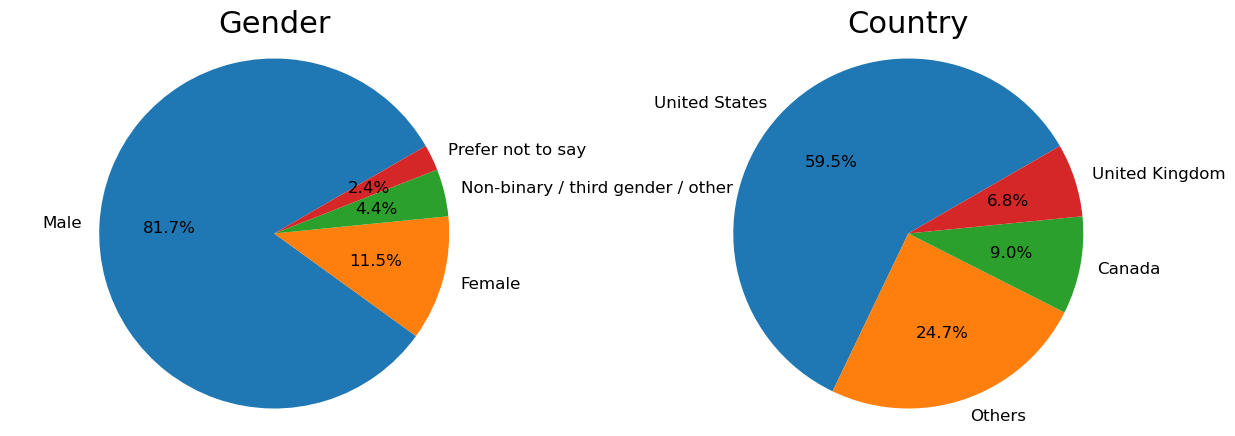

In [22]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=[15,5]
)
axes=axes.flatten()
my_counter = Counter(df['Gender'])
labels=[key for [key,value] in my_counter.items()]
sizes=[value for [key,value] in my_counter.items()]

order = df['Gender'].value_counts().index
new_order=[labels.index(item) for item in order]
labels=[labels[i] for i in new_order]
sizes=[sizes[i] for i in new_order]

ax=axes[0]
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=30, textprops={'fontsize': 12})
ax.axis('equal')  
ax.set_title('Gender', fontsize=22)

#################
my_counter = Counter(df['Country'])
labels=[key for [key,value] in my_counter.items()]
sizes=[value for [key,value] in my_counter.items()]

order = df['Country'].value_counts().index
new_order=[labels.index(item) for item in order]
labels=[labels[i] for i in new_order]
sizes=[sizes[i] for i in new_order]

ax=axes[1]
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=30, textprops={'fontsize': 12})
ax.axis('equal')  
ax.set_title('Country', fontsize=22);
#####


## 	VRChat is the single most popular VR app followed by Beat Saber

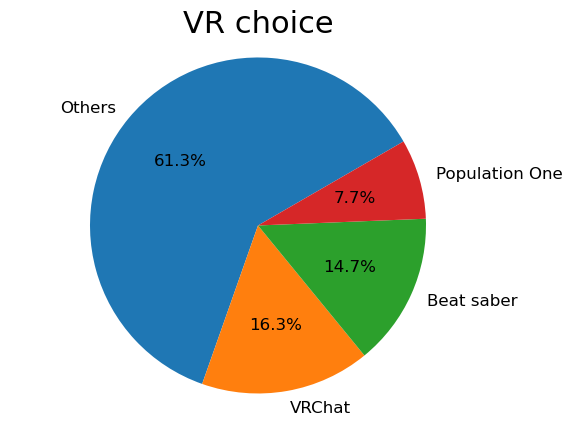

In [24]:
my_counter = Counter(df['VR_app'])# df['VR_app'].value_counts()
labels=[key for [key,value] in my_counter.items()]
sizes=[value for [key,value] in my_counter.items()]

order = df['VR_app'].value_counts().index
new_order=[labels.index(item) for item in order]
labels=[labels[i] for i in new_order]
sizes=[sizes[i] for i in new_order]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=30, textprops={'fontsize': 12})
plt.axis('equal')  
plt.title('VR choice', fontsize=22)
plt.show()

In [25]:
# #pairplots
# sns.pairplot(df[['Days_week', 'Hours_day', 'Hours_per_week','GAS7_sum','VRtype']], hue='VRtype', height=2, aspect=1)
# plt.maplower
# plt.show()

# Does Age, Country and Playtime correlate with VR type preferance (Game vs SocialVR)

## In general (>60%) users prefer Game over SocialVR, regardless of country origin

In [28]:
# merge 3 binary VRtype columns into 1 categorical column
df_type=df[['Game', 'SocialVR', 'Other']]
df['VRtype']=df_type[df_type == 1].idxmax(axis=1)

In [32]:
#sort by country counts
country_order = df['Country'].value_counts().index
country_order = pd.Index(country_order.drop('Others').tolist() + ['Others'])
print(country_order)

Index(['United States', 'Canada', 'United Kingdom', 'Others'], dtype='object')


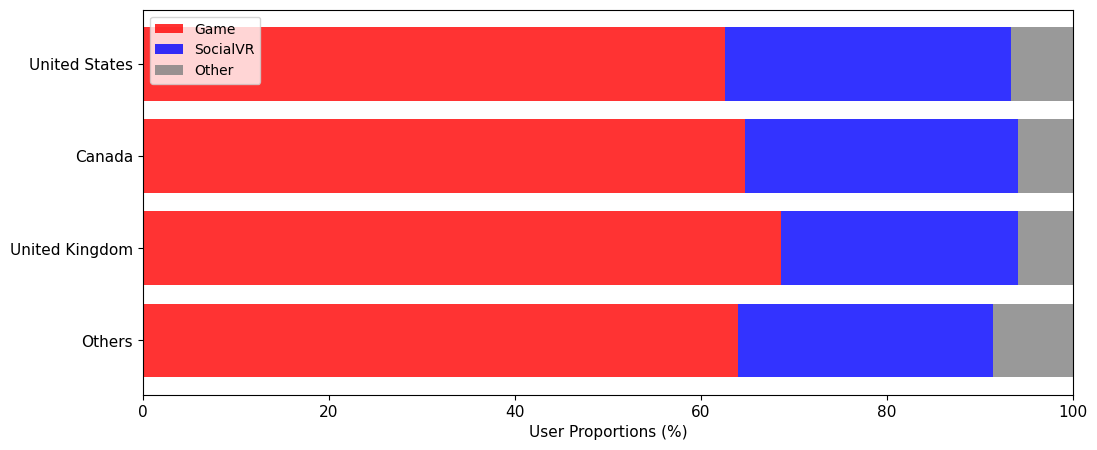

In [33]:
VRpref = df[['VRtype', 'Country']].groupby('Country')['VRtype'].value_counts().unstack().loc[country_order[::-1]]
VRpref['sum'] = VRpref.sum(axis=1)
VRpref_ratio = (VRpref.T / VRpref['sum']*100).T[['Game', 'SocialVR', 'Other']]#.sort_values(by='Game',ascending=False)#[::-1]
# print(VRpref_ratio)


# ###
fig, ax = plt.subplots(1,1,figsize=(12, 5),)

ax.barh(VRpref_ratio.index, VRpref_ratio['Game'], 
         alpha=0.8, label='Game',color='red')
ax.barh(VRpref_ratio.index, VRpref_ratio['SocialVR'], left=VRpref_ratio['Game'], 
         alpha=0.8, label='SocialVR',color='blue')
ax.barh(VRpref_ratio.index, VRpref_ratio['Other'], left=VRpref_ratio['Game']+VRpref_ratio['SocialVR'], 
         alpha=0.8, label='Other',color='gray')
ax.legend
ax.set_xlim(0, 100)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("User Proportions (%)",fontsize=11)
plt.legend();

## SocialVR is more catered towards the younger population than the older group


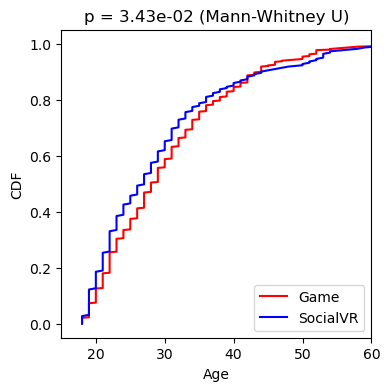

In [29]:
df.sort_values(by= "Age" ,inplace=True)
# plt.figure(dpi=200)
fig, axes = plt.subplots(
    # nrows=1,
    # ncols=1,
    figsize=[4,4]
)
data1=df[df['VRtype']=='Game']['Age'].tolist()
data2=df[df['VRtype']=='SocialVR']['Age'].tolist()
_,p=stats.mannwhitneyu(data1, data2)

#CDF calculation
y1 = np.arange(len(data1)) / float(len(data1) - 1)
y2 = np.arange(len(data2)) / float(len(data2) - 1)
plt.plot(data1,y1, color='red',label='Game')
plt.plot(data2,y2, color='blue',label='SocialVR')
plt.legend(loc='lower right')
plt.grid(False)
plt.xlabel('Age')
plt.ylabel('CDF')
plt.title(f'p = {p:0.2e} (Mann-Whitney U)')
plt.xlim(15,60);

In [30]:
# # Histogram of age (similar to above)
# df.sort_values(by= "Age" ,inplace=True)
# data1=df[df['VRtype']=='Game']['Age'].tolist()
# data2=df[df['VRtype']=='SocialVR']['Age'].tolist()
# _,p=stats.mannwhitneyu(data1, data2)

# bins=np.arange(15,65,2)
# plt.hist(data1,bins=bins, histtype='step',density=True, alpha=0.3,color='red')
# plt.hist(data2,bins=bins, histtype='step',density=True, alpha=0.3,color='blue')
# plt.title(f'p = {p:0.2e}')

## Users spend more time on SocialVR than in games

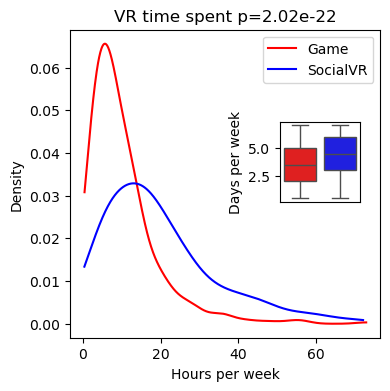

VRtype
Game        3.5
SocialVR    4.4
Name: Days_week, dtype: float64


In [35]:
fig, ax1 = plt.subplots(figsize=[4,4])
# Data
data1=df[df['VRtype']=='Game']['Hours_per_week']
data2=df[df['VRtype']=='SocialVR']['Hours_per_week']
_,p=stats.mannwhitneyu(data1, data2)
# plt.hist(data1, bins=7, histtype='step', density=True, color='blue', label='Histogram')

# Plot density curve
kde = stats.gaussian_kde(data1)
x_values = np.linspace(min(data1), max(data1), 1000)
ax1.plot(x_values, kde(x_values), color='red', label='Game')
kde = stats.gaussian_kde(data2)
x_values = np.linspace(min(data2), max(data2), 1000)
ax1.plot(x_values, kde(x_values), color='blue', label='SocialVR')
# Customize the plot
plt.title(f'VR time spent p={p:.2e}')
plt.xlabel('Hours per week')
plt.ylabel('Density')
plt.legend()
plt.grid(False)
##inset
ax2 = fig.add_axes([0.65, 0.45, 0.2, 0.2]) 
data1=df[df['VRtype']!='Other']
sns.boxplot(y='Days_week', x='VRtype' , data=data1,ax=ax2,palette={'Game':'red','SocialVR':'blue'})
medians = data1.groupby(['VRtype'])['Days_week'].median()
ax2.set_xticks([])
plt.xlabel(None)
plt.ylabel('Days per week')

plt.show()

##############
print(medians)

In [36]:
# #Boxplots of all time spent measurement on all VRtypes
# fig, axes = plt.subplots(1,3,figsize=[12,4])
# axes = axes.flatten()

# df['Days_week']

# df.sort_values(by= "VRtype" ,inplace=True)
# ax=axes[0]
# sns.boxplot(y='Days_week', x='VRtype' , data=df, ax=ax)
# ax=axes[1]
# sns.boxplot(y='Hours_day', x='VRtype' , data=df, ax=ax)
# ax=axes[2]
# sns.boxplot(y='Hours_per_week', x='VRtype' , data=df, ax=ax)# sns.boxplot(y='Days_week', x='VRtype' , hue='VRtype' , data=df)
    
# plt.tight_layout()
###

# C. Feature correlation with addiction severity (GAS7_sum)

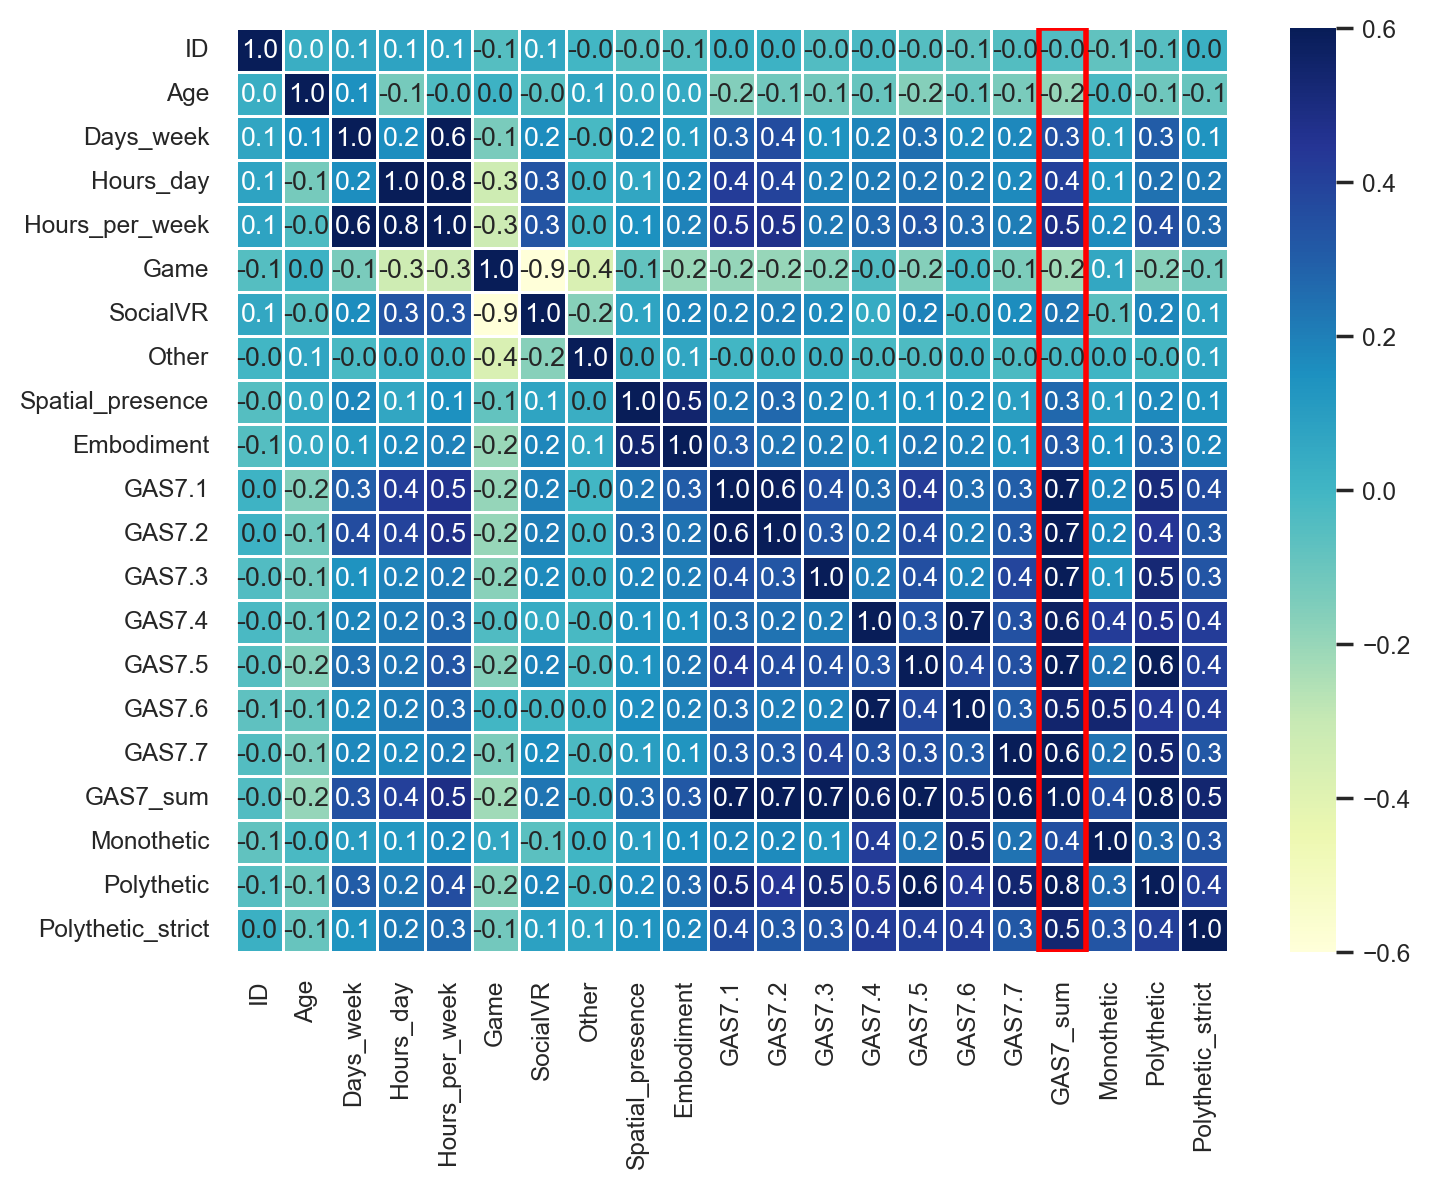

In [38]:
# # change each categorical column into multiple binary columns for training
# categorical_columns = df.select_dtypes(include=['object']).columns
# df1 = pd.get_dummies(df, columns=categorical_columns)
# Corrmat = df1.corr()
Corrmat = df.corr(numeric_only=True)
featN,_=Corrmat.shape

plt.figure(figsize=(8, 6), dpi=200)
sns.set(font_scale=0.8)
sns.heatmap(Corrmat, annot=True,fmt=".1f", linewidth=.5, cmap="YlGnBu")
ax = plt.gca()
ax.collections[0].set_clim(-0.6,0.6)  
# sns.heatmap(Corrmat, annot=True,fmt=".2f", linewidth=.25)
import matplotlib.patches as patches
ax.add_patch(
     patches.Rectangle(
         (17,0),
         1.0,
         featN,
         edgecolor='red',
         fill=False,
         lw=2
     ) );


## More frequent use of VR correlates with addiction

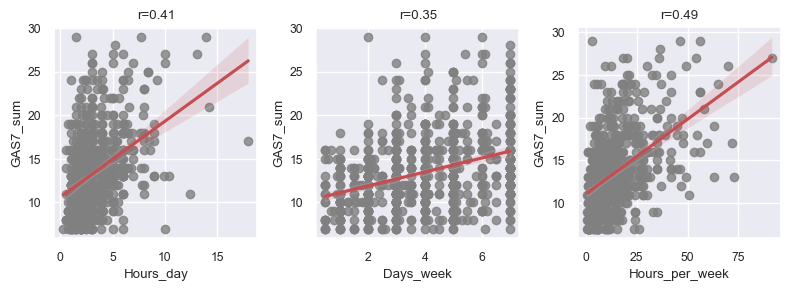

In [40]:
fig, axes = plt.subplots(1,3,figsize=[8,3])
axes = axes.flatten()
ax=axes[0]
sns.regplot(x='Hours_day', y='GAS7_sum', data=df,ax=ax, order=1, color=".5", line_kws=dict(color="r"))
r, _ = stats.pearsonr(df['Hours_day'], df['GAS7_sum'])
ax.set_title(f'r={r:0.2f}')

ax=axes[1]
sns.regplot(x='Days_week', y='GAS7_sum', data=df,ax=ax, order=1, color=".5", line_kws=dict(color="r"))
r, _ = stats.pearsonr(df['Days_week'], df['GAS7_sum'])
ax.set_title(f'r={r:0.2f}')

ax=axes[2]
sns.regplot(x='Hours_per_week', y='GAS7_sum', data=df,ax=ax, order=1, color=".5", line_kws=dict(color="r"))
r, _ = stats.pearsonr(df['Hours_per_week'], df['GAS7_sum'])
ax.set_title(f'r={r:0.2f}')

plt.tight_layout()

## Stronger addiction is associated with SocialVR over Games

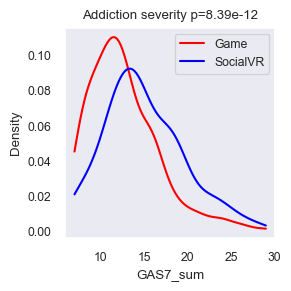

In [42]:
df.sort_values(by= "GAS7_sum" ,inplace=True)
fig, ax1 = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=[3,3]
)
# Data
data1=df[(df['VRtype'] == 'Game')]['GAS7_sum']
data2=df[(df['VRtype'] == 'SocialVR')]['GAS7_sum']
_,p=stats.mannwhitneyu(data1, data2)

# Plot density curve
kde = stats.gaussian_kde(data1)
x_values = np.linspace(min(data1), max(data1), 100)
ax1.plot(x_values, kde(x_values), color='red', label='Game')
kde = stats.gaussian_kde(data2)
x_values = np.linspace(min(data2), max(data2), 100)
ax1.plot(x_values, kde(x_values), color='blue', label='SocialVR')
# Customize the plot
plt.title(f'VR time spent p={p:.2e}')
plt.xlabel('GAS7_sum')
plt.ylabel('Density')
plt.legend()
plt.grid(False)

# plt.hist(data1,density=True, alpha=0.3)
# plt.hist(df.loc[(df['VRtype'] == 'SocialVR')]['GAS7_sum'],density=True, alpha=0.3)
plt.tight_layout()
plt.title(f'Addiction severity p={p:0.2e}')

# Add legend
plt.legend(['Game', 'SocialVR']);

## Spatial and embodied perception correlates with addiction

In [44]:
def anova_tukey(df,col_2b_groupedby,col_2_test):
    G=sorted(df[col_2b_groupedby].unique().tolist())
    # anova
    perception_groups=[]
    groups_ID=[]
    for i in range(len(G)):
        temp=df[df[col_2b_groupedby]==G[i]][col_2_test].tolist()
        for value in temp:
            perception_groups.append(value)
            groups_ID.append(G[i])
    perception_groups=np.array(perception_groups)
    groups_ID=np.array(groups_ID)

    listinlist=[perception_groups[groups_ID==G[i]].tolist() for i in range(len(G))]  
    _,p = stats.f_oneway(*listinlist)
    # _,p = stats.f_oneway(perception_groups[groups_ID==0], perception_groups[groups_ID==1], perception_groups[groups_ID==2],perception_groups[groups_ID==3],perception_groups[groups_ID==4])
    posthoc_1=pairwise_tukeyhsd(perception_groups, groups_ID)

    return p,posthoc_1

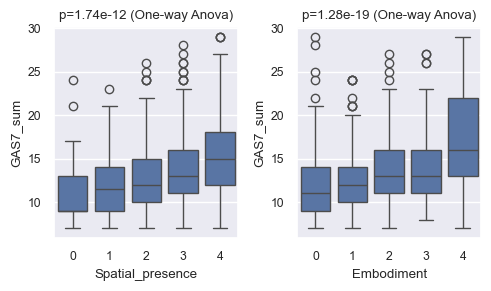

In [45]:
# does Spatial_presence and Embodiment predicts VR addiction
fig, axes = plt.subplots(1,2,figsize=[5,3])
axes = axes.flatten()
# Spatial_presence
ax=axes[0]
df.sort_values(by= "Spatial_presence" ,inplace=True)
sns.boxplot(y='GAS7_sum', x='Spatial_presence' ,data=df, ax=ax)
# anova with post hoc Tukey
p,posthoc_1=anova_tukey(df,'Spatial_presence','GAS7_sum')
ax.set_title(f'p={p:0.2e} (One-way Anova)')
plt.tight_layout()
# Embodiment
ax=axes[1]
df.sort_values(by= "Embodiment" ,inplace=True)
sns.boxplot(y='GAS7_sum', x='Embodiment' ,data=df, ax=ax)
# anova with post hoc Tukey
p,posthoc_2=anova_tukey(df,'Embodiment','GAS7_sum')
ax.set_title(f'p={p:0.2e} (One-way Anova)')
plt.tight_layout()


In [46]:
# Post-hoc Tukey results
print(posthoc_1) #spatial presence
print(posthoc_2) #embodiment

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.4184 0.9941 -2.3721 3.2088  False
     0      2   1.2016 0.7282 -1.4494 3.8525  False
     0      3   2.2554 0.1318 -0.3738 4.8847  False
     0      4   4.1156 0.0003  1.4085 6.8228   True
     1      2   0.7832 0.5507 -0.6271 2.1935  False
     1      3   1.8371 0.0024  0.4679 3.2063   True
     1      4   3.6973    0.0  2.1839 5.2106   True
     2      3   1.0539 0.0508 -0.0023 2.1101  False
     2      4   2.9141    0.0  1.6768 4.1514   True
     3      4   1.8602 0.0002    0.67 3.0504   True
---------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.3603 0.9323   -0.88 1.6005  False
     0      2   1.6458 0.0038  0.3778 2.9138   True
     0      

# D. Model Prediction of Addiction from given features

In [48]:
from sklearn.model_selection import train_test_split
#Classification
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble  import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
#Regression
# from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.inspection import permutation_importance

In [49]:
independent_feats=['Age','Days_week','Hours_day','Hours_per_week','Game','SocialVR','Other','Spatial_presence','Embodiment']
dependent_feat=['GAS7_sum']
# dependent_feat=['Polythetic']
# remove rows where VR type is not Game or SocialVR
df1=df#[(df['Gender']=='Male') & (df['Country']=='United States')]
df1.shape

(754, 25)

In [50]:
X=df1[independent_feats]
y=df1[dependent_feat]
print(X.dtypes)
print(y.dtypes)

Age                   int64
Days_week           float64
Hours_day           float64
Hours_per_week      float64
Game                  int64
SocialVR              int64
Other                 int64
Spatial_presence      int64
Embodiment            int64
dtype: object
GAS7_sum    int64
dtype: object


In [51]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Model Selection
# model=LogisticRegression(max_iter=1000)
# model=RandomForestClassifier()
# model=SVC()
# model=GaussianNB()
# model=RandomForestRegressor(random_state=42)
# model=Lasso(random_state=42)
model=Ridge(random_state=42)

# Model Training and fitting
model.fit(X_train, y_train)
# Prediction
y_pred = model.predict(X_test)

# Model accuracy    
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# coefficients = model.coef_
# acc = accuracy_score(y_test, y_pred) * 100
# cm = confusion_matrix(y_test, y_pred)

In [52]:
print(mse)
print(mae)
print(r2)


11.522426867946525
2.680059996848396
0.40439972474632235


In [53]:
# # confusion matrix for classification
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix')
# plt.xlabel("Predicted")
# plt.ylabel("Actual")

Text(0.5, 1.0, 'r2 = 0.40')

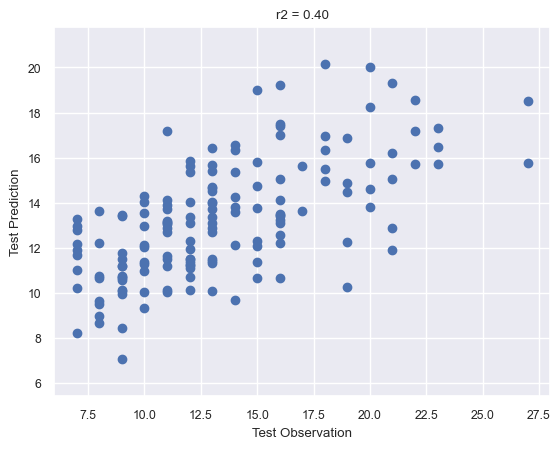

In [54]:
plt.scatter(y_test, y_pred)
plt.axis('equal') 
plt.xlabel('Test Observation')
plt.ylabel('Test Prediction')
plt.title(f'r2 = {r2:0.2f}')
# plt.scatter(y_train, model.predict(X_train))
# plt.axis('equal') 

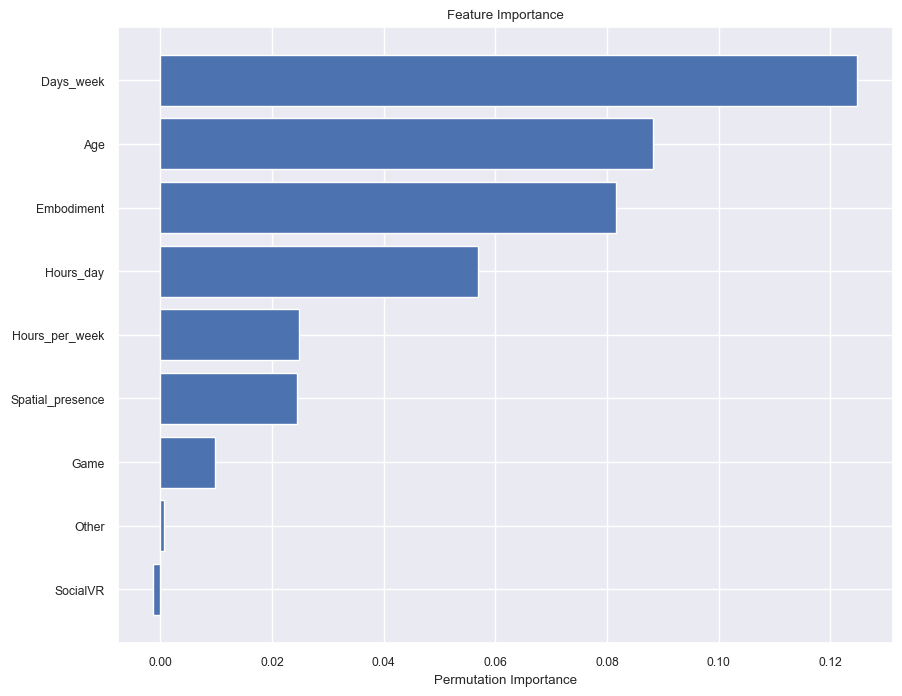

In [55]:
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance')
plt.show()

## Summary and Discussion

What we learned:
- VRChat is the most popular VR app followed closely by Beat Saber
- The majority of users (60%) uses VR for games, regardless of location
- Socializing VR apps are more catered towards the younger population, and see increased use time over gaming

- VR addiction correlates with prolonged VR use, user's spatial and embodied presence and is more prominent with socialVR users
- Model prediction also finds age as an important factor

What is next:
- Increase dataset coverage over different gender and country
- Perform more sophisticated analysis (e.g. neural networks)
- Dive into the details of GAS 7.1-7.7 and investigate their importance on addiction prediction